### 1. Import Data and Required Packages

In [135]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('PokemonGo.csv')
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,[1.58],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[1.2, 1.6]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


Drop Unnecessary index Column

In [136]:
df.drop(['num'],axis=1,inplace=True)

In [103]:
df.columns

Index(['id', 'name', 'img', 'type', 'height', 'weight', 'candy', 'candy_count',
       'egg', 'spawn_chance', 'avg_spawns', 'spawn_time', 'multipliers',
       'weaknesses', 'next_evolution', 'prev_evolution'],
      dtype='object')

### Numerical Features

In [104]:
num_feat = [num for num in df.columns if df[num].dtypes !='O']
print('We have {} numerical features are {}'.format(len(num_feat),num_feat))

We have 4 numerical features are ['id', 'candy_count', 'spawn_chance', 'avg_spawns']


### Categorical Features

In [105]:
cat_feat = [cat for cat in df.columns if df[cat].dtypes == 'O']
cat_feat

['name',
 'img',
 'type',
 'height',
 'weight',
 'candy',
 'egg',
 'spawn_time',
 'multipliers',
 'weaknesses',
 'next_evolution',
 'prev_evolution']

In [106]:
df.describe()

,id,candy_count,spawn_chance,avg_spawns
count,151.000000,70.000000,151.000000,151.000000
mean,76.000000,57.300000,0.731985,53.992603
std,43.734045,48.897512,1.956376,111.156064
min,1.000000,12.000000,0.000000,0.000000
25%,38.500000,31.250000,0.015500,1.450000
50%,76.000000,50.000000,0.074000,7.200000
75%,113.500000,50.000000,0.620000,55.000000
max,151.000000,400.000000,15.980000,712.000000


In [107]:
df.dtypes

id                  int64
name               object
img                object
type               object
height             object
weight             object
candy              object
candy_count       float64
egg                object
spawn_chance      float64
avg_spawns        float64
spawn_time         object
multipliers        object
weaknesses         object
next_evolution     object
prev_evolution     object
dtype: object

### Check the Null values

In [108]:
df.isnull().sum()

id                 0
name               0
img                0
type               0
height             0
weight             0
candy              0
candy_count       81
egg                0
spawn_chance       0
avg_spawns         0
spawn_time         6
multipliers       81
weaknesses         0
next_evolution    81
prev_evolution    79
dtype: int64

### Check Information and datatypes all column

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   name            151 non-null    object 
 2   img             151 non-null    object 
 3   type            151 non-null    object 
 4   height          151 non-null    object 
 5   weight          151 non-null    object 
 6   candy           151 non-null    object 
 7   candy_count     70 non-null     float64
 8   egg             151 non-null    object 
 9   spawn_chance    151 non-null    float64
 10  avg_spawns      151 non-null    float64
 11  spawn_time      145 non-null    object 
 12  multipliers     70 non-null     object 
 13  weaknesses      151 non-null    object 
 14  next_evolution  70 non-null     object 
 15  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(12)
memory usage: 19.0+ KB


## Univariate Analysis

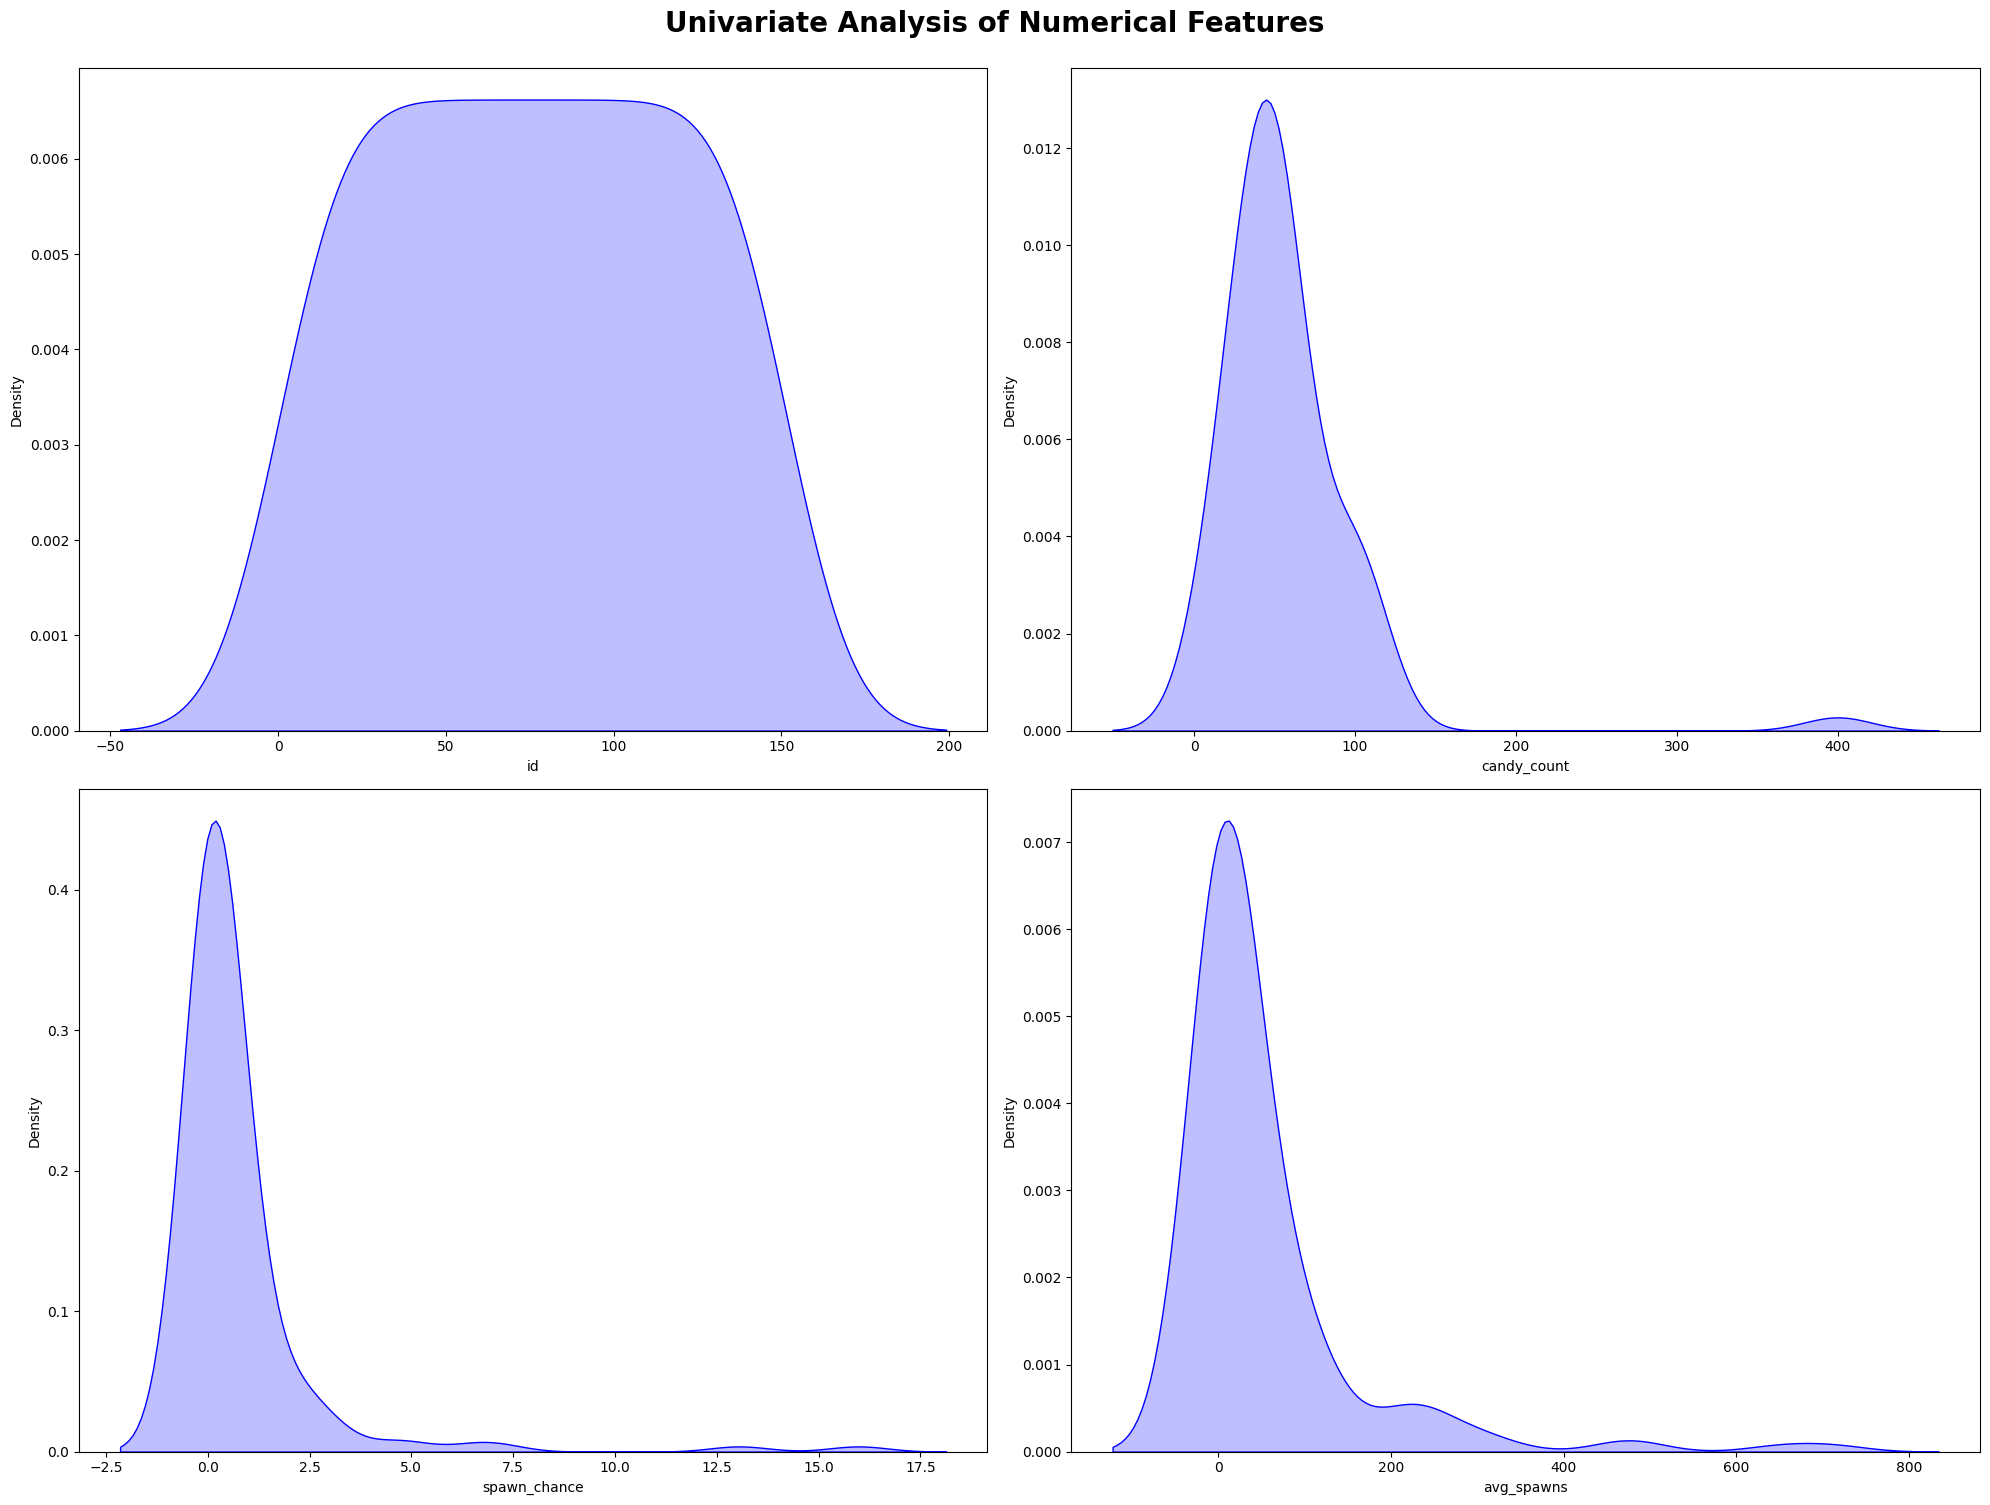

In [110]:
fig = plt.figure(figsize = (20,15))
plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20,fontweight='bold',y=1.)
for i in enumerate(num_feat):
    plt.subplot(2,2,i[0]+1)
    sns.kdeplot(x=df[num_feat[i[0]]],shade='True',color='b')
    plt.xlabel(num_feat[i[0]])
    plt.tight_layout()

## Multivariate Analysis

In [111]:
df.corr()

,id,candy_count,spawn_chance,avg_spawns
id,1.000000,0.189351,-0.221272,-0.156181
candy_count,0.189351,1.000000,-0.082417,0.082224
spawn_chance,-0.221272,-0.082417,1.000000,0.521474
avg_spawns,-0.156181,0.082224,0.521474,1.000000


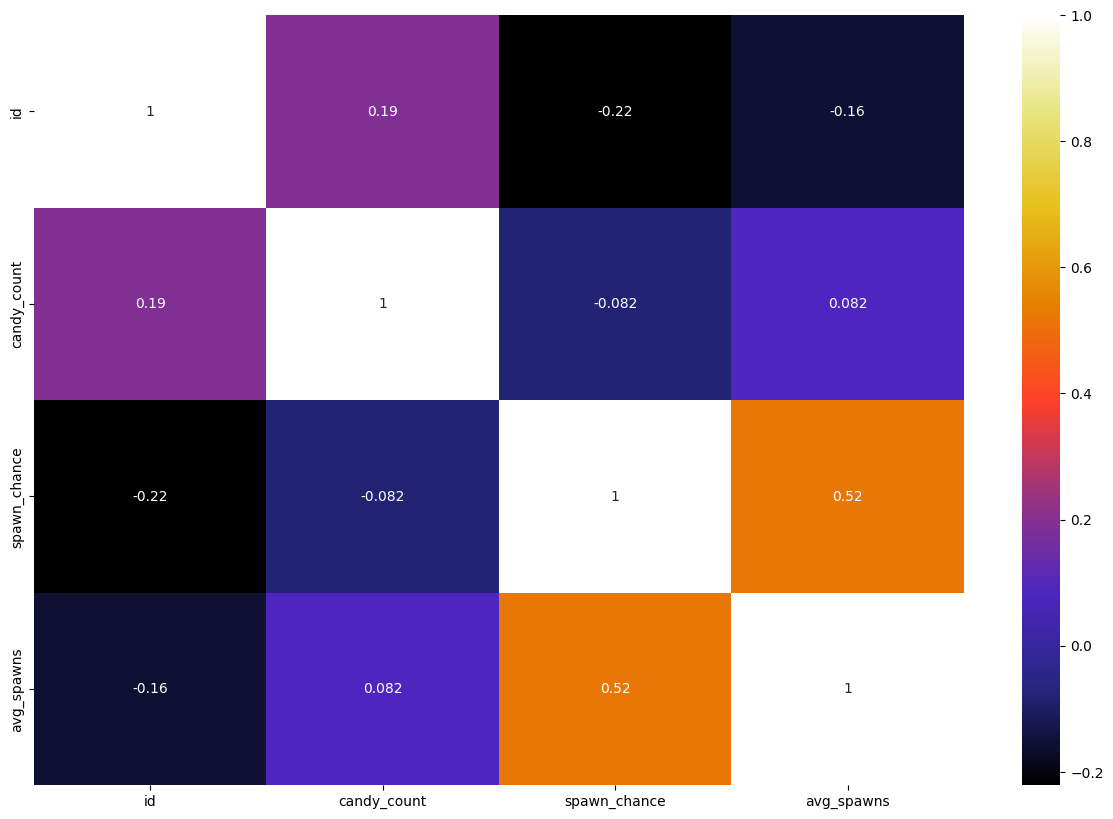

In [112]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

### 1.Get all Pokemons whose spawn rate is less than 5%

In [113]:
df[df['avg_spawns'] < 5.0]['name'].unique()

array(['Ivysaur', 'Venusaur', 'Charmeleon', 'Charizard', 'Wartortle',
       'Blastoise', 'Butterfree', 'Pidgey', 'Rattata', 'Raichu',
       'Sandslash', 'Nidoqueen', 'Nidoking', 'Clefable', 'Ninetales',
       'Wigglytuff', 'Vileplume', 'Dugtrio', 'Persian', 'Primeape',
       'Arcanine', 'Poliwrath', 'Kadabra', 'Alakazam', 'Machoke',
       'Machamp', 'Victreebel', 'Golem', 'Rapidash', 'Slowbro',
       'Magneton', "Farfetch'd", 'Dewgong', 'Muk', 'Cloyster', 'Gengar',
       'Electrode', 'Exeggutor', 'Marowak', 'Hitmonlee', 'Hitmonchan',
       'Lickitung', 'Weezing', 'Rhydon', 'Chansey', 'Kangaskhan',
       'Seadra', 'Starmie', 'Mr. Mime', 'Gyarados', 'Lapras', 'Ditto',
       'Vaporeon', 'Jolteon', 'Flareon', 'Porygon', 'Omastar', 'Kabutops',
       'Aerodactyl', 'Snorlax', 'Articuno', 'Zapdos', 'Moltres',
       'Dragonair', 'Dragonite', 'Mewtwo', 'Mew'], dtype=object)

### 2. Get all Pokemons that have less than 4 weaknesses

In [114]:
df['New_Weeknesses']= [len(i) for i in df['weaknesses']]

In [115]:
df[df["New_Weeknesses"] < 36]["name"].unique()

array(['Charmander', 'Charmeleon', 'Charizard', 'Squirtle', 'Wartortle',
       'Blastoise', 'Caterpie', 'Metapod', 'Pidgey', 'Pidgeotto',
       'Pidgeot', 'Rattata', 'Raticate', 'Spearow', 'Fearow', 'Ekans',
       'Arbok', 'Pikachu', 'Raichu', 'Sandshrew', 'Sandslash',
       'Nidoran ♀ (Female)', 'Nidorina', 'Nidoran ♂ (Male)', 'Nidorino',
       'Clefairy', 'Clefable', 'Vulpix', 'Ninetales', 'Jigglypuff',
       'Wigglytuff', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Poliwag', 'Poliwhirl', 'Abra', 'Kadabra', 'Alakazam', 'Machop',
       'Machoke', 'Machamp', 'Tentacool', 'Tentacruel', 'Ponyta',
       'Rapidash', 'Magnemite', 'Magneton', "Farfetch'd", 'Doduo',
       'Dodrio', 'Seel', 'Grimer', 'Muk', 'Shellder', 'Drowzee', 'Hypno',
       'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Cubone', 'Marowak',
       'Hitmonlee', 'Hitmonchan', 'Lickitung', 'Koffing', 'Weezing',
       'Chansey', 'Kangas

### 3.Get all Pokemons that have no multipliers at all

In [116]:
df[df['multipliers'].isnull()]['name']

2        Venusaur
5       Charizard
8       Blastoise
11     Butterfree
14       Beedrill
          ...    
144        Zapdos
145       Moltres
148     Dragonite
149        Mewtwo
150           Mew
Name: name, Length: 81, dtype: object

### 4. Get all Pokemons that do not have more than 2 evolutions

In [117]:
df['prev_evolution'] = df['prev_evolution'].fillna('O')
df['next_evolution'] = df['next_evolution'].fillna('O')

In [118]:
df['Total_evolution'] = df['prev_evolution'] + df['next_evolution']

In [119]:
df['New_evolution']= [len(i) for i in df['Total_evolution']]

In [120]:
df[df["New_evolution"] < 72]["name"].unique()

array(['Weedle', 'Kakuna', 'Beedrill', 'Pidgeotto', 'Rattata', 'Raticate',
       'Spearow', 'Fearow', 'Ekans', 'Arbok', 'Pikachu', 'Raichu',
       'Sandshrew', 'Sandslash', 'Clefairy', 'Clefable', 'Vulpix',
       'Ninetales', 'Jigglypuff', 'Wigglytuff', 'Zubat', 'Golbat',
       'Oddish', 'Gloom', 'Vileplume', 'Paras', 'Parasect', 'Venonat',
       'Venomoth', 'Diglett', 'Dugtrio', 'Meowth', 'Persian', 'Psyduck',
       'Golduck', 'Mankey', 'Primeape', 'Growlithe', 'Arcanine',
       'Kadabra', 'Alakazam', 'Machop', 'Machoke', 'Machamp', 'Tentacool',
       'Tentacruel', 'Geodude', 'Graveler', 'Ponyta', 'Rapidash',
       'Slowpoke', 'Slowbro', 'Magnemite', 'Magneton', "Farfetch'd",
       'Doduo', 'Dodrio', 'Seel', 'Dewgong', 'Grimer', 'Muk', 'Shellder',
       'Cloyster', 'Gastly', 'Haunter', 'Gengar', 'Onix', 'Drowzee',
       'Hypno', 'Krabby', 'Kingler', 'Voltorb', 'Electrode', 'Exeggcute',
       'Exeggutor', 'Cubone', 'Marowak', 'Hitmonlee', 'Hitmonchan',
       'Lickitung', 

### 5.Get all Pokemons whose spawn time is less than 300 seconds.

In [138]:
df['spawn_time'] = df['spawn_time'].fillna('00:00')

In [151]:
def spawn_time_to_seconds(spawn_time):
    minutes, seconds = spawn_time.split(":")
    return int(minutes) * 60 + int(seconds)

# Filter Pokémon whose spawn time is less than 300 seconds
fast_spawn_pokemon = [i for i in df['spawn_time'] if spawn_time_to_seconds(i) < 300]
for i in fast_spawn_pokemon:
    print(df[df['spawn_time'] == i]['name'].unique())

['Squirtle']
['Blastoise']
['Metapod']
['Weedle']
['Kakuna' 'Jolteon']
['Beedrill']
['Pidgey']
['Pidgeotto']
['Pidgeot' 'Arbok']
['Rattata' 'Machop']
['Raticate']
['Fearow']
['Pidgeot' 'Arbok']
['Pikachu' 'Rapidash']
['Sandshrew']
['Nidoran ♀ (Female)' 'Drowzee' 'Cubone' 'Mr. Mime']
['Nidoran ♂ (Male)']
['Clefairy']
['Clefable']
['Ninetales' 'Poliwrath']
['Golbat' 'Gyarados']
['Oddish']
['Paras']
['Parasect']
['Venonat']
['Diglett']
['Meowth']
['Persian']
['Psyduck']
['Growlithe']
['Arcanine']
['Poliwag']
['Ninetales' 'Poliwrath']
['Abra']
['Rattata' 'Machop']
['Machamp']
['Bellsprout' 'Electrode']
['Tentacool']
['Graveler']
['Ponyta']
['Pikachu' 'Rapidash']
['Slowbro']
['Magnemite']
["Farfetch'd"]
['Dodrio']
['Muk']
['Cloyster']
['Gastly']
['Haunter']
['Gengar']
['Onix']
['Nidoran ♀ (Female)' 'Drowzee' 'Cubone' 'Mr. Mime']
['Hypno']
['Krabby']
['Kingler']
['Voltorb']
['Bellsprout' 'Electrode']
['Nidoran ♀ (Female)' 'Drowzee' 'Cubone' 'Mr. Mime']
['Marowak' 'Hitmonlee']
['Marowak' 'Hit